# What is Stable Diffusion?

Stable diffusion has made a revolutionary entry to world changing lots of state-of-the-art methods that was existing for such a long time. But what is stable diffusion? What are the main components of it? What is the architecture of it? There are so many questions! So let'stry to get a high-level understanding of what stable diffusionis.

First, let's take our usual mnist digit classifier for an example. As shown in the figure below, if we give it a handwritten image as the input, it will predict the value of that digit.

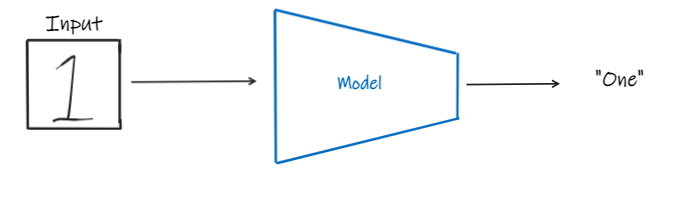

But, what if we input the same image but with some noise now as shown below? Most of the time the model will be able to predict it correctly right?

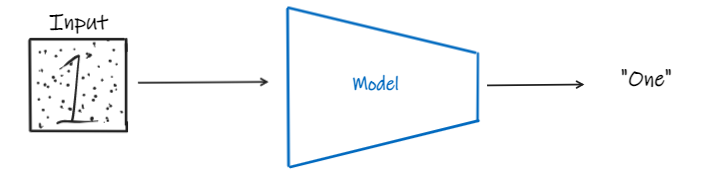

So, what does this mean? Basically, this means that our model is capable of differentiating the noise from the actual information.Isn't this amazing? But, is there any way we can use this to generate images? This is exactly what diffusion models do. They start with pure noise and then they goes through a denoising process to get to the new generated image. Let's see what modifications we have to do in order to get there.

Firstly, in the above mentioned example, we have a multi-class classification case. So we will be using a backbone like ResNet as the model and change the head of the model accordingly. But, when it comes to the image generation, we want to get an image as the output. So what kind of a model should we use? Think of a similar kind of an application, where we input an image and get an image as the output. Did you guess it? Yes, we use a U-Net as our model.

But, how do we use U-Net architecture to generate an image? So the catch is, we do not generate an image as the output. Think that we input an image with certain information with some amount of noise. We train our U-Net to predict the noise of the image. Then, we get the output, which is the noise, and substract it from the input to get the denoised image. The process is as shown below.

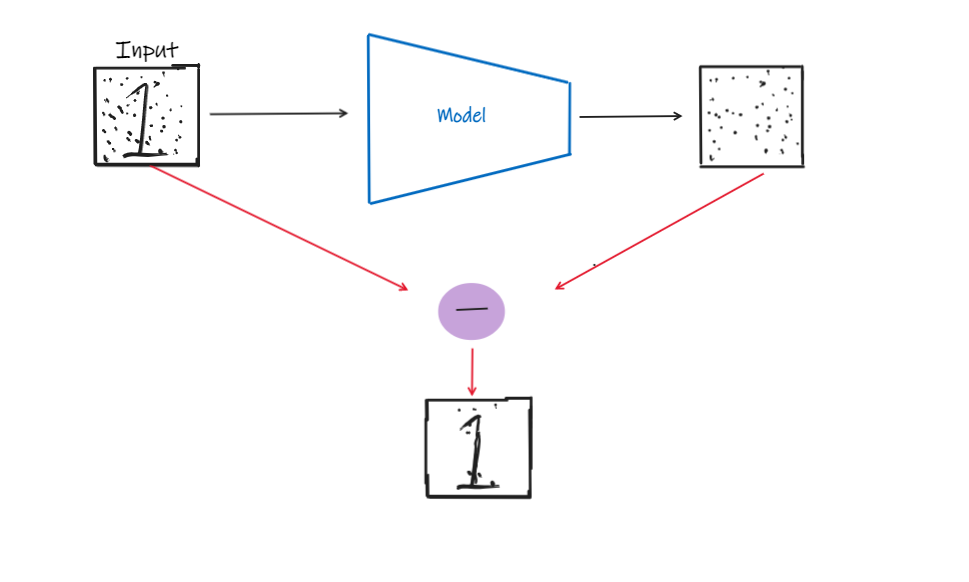

Okay,there are so many things to explain I know. But lets+'s get to there one step at a time. First thing to note is that, the U-Net is not able to predict the noise from just one step (as of October 2022, things change so fast :P). It will use something like a feedback loop here. In other words, it will predict the noise from the initial input and then, it will substract and the noise from the input and use the new image as the input in the next step. Likewise, it will continue this process for multiple number of steps. 

But the thing is, the U-Net architectures are so computationally expensive. It will work fine for mnist as they are 128x128 images, but what if we use an input of size 512x512. It will take hours right? So to reduce the computational complexity, we use a variational encoder. As you know, in a VAE, we have an encoder and an decoder. We first use the encoder to get input latents to the U-Net and continue the denoising process explained above to denoice the noisy latents. Then, we get the output of the U-Net and input that to the decoder to get the output image. Pretty cool right?! 

So you may ask now, how we can generate new images if we have to input the image we want to generate with some added noise to get back the image itself? The catch is, we input pure noise. That's right. So our model starts with pure noise and then follow up with a denoising process to generate new images. But, if that's the case, the output can be any random image right? Because, there is no assuarance that this will output ameaningful image by starting with pure noise without any guidance. Aha! we need some guidance! So, how we give guidance to our model to let them know about what kind of an output we are looking for? The answer is, we use a prompt. So a prompt is a description of the output we seeking for. But we cannot input a string to the model. It only recognizes features. So we use a text encoder to get encodings of the prompt. This is where CLIP comes in (I will cover the concept of CLIP in a future blog, for now, just think of it as a model that outputs text encodings).

So now, we have everything we needs. We first initialize a random image of the output size we looking for which has to be a power of 2. Then, we use the encoder of the VAE to get the noisy latents. We parallely get the encodings of the prompt too. Then, we input this into our U-Net model and iteratively predict the noise for a predefined number of steps. Then, we get the output of the U-Net and input that into the decoder to get the spatial domain generated image.

Hope, this blog gave you a high-level understanding of the idea of stable diffusion. In the coming blogs, I will dive into the mathematical aspect of diffusion models. To follow them, you will need to have some knowledge on random processes, Gaussian (Normal) distribution, and some calculus. So be ready!